In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta
from collections import defaultdict
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from june import paths
from june.policy import Policy, Policies

No --data argument given - defaulting to:
/Users/josephbullock/Documents/covidmodelling/JUNE-private/data
No --configs argument given - defaulting to:
/Users/josephbullock/Documents/covidmodelling/JUNE-private/june/configs


In [2]:
policy_filename = (
    paths.configs_path / "defaults/policy/policy.yaml"
)

In [3]:
policies = Policies.from_file(policy_filename)

In [4]:
active_interaction_policies = policies.interaction_policies.get_active(
    date=datetime(2020,3,23)
)

In [5]:
groups = []
for group in active_interaction_policies[0].beta_factors:
    groups.append(group)

In [6]:
groups

['box',
 'pub',
 'grocery',
 'cinema',
 'city_transport',
 'inter_city_transport',
 'hospital',
 'care_home',
 'company',
 'school',
 'household',
 'university',
 'gym',
 'household_visits',
 'care_visits']

In [7]:
no_days = 200
begin_date = datetime(2020,3,1)

In [8]:
len(groups)

15

In [11]:
dates = []
group_betas = np.ones((200,len(groups)))
for i in range(no_days):
    date = begin_date + timedelta(i)
    dates.append(date)
    active_interaction_policies = policies.interaction_policies.get_active(
            date=date
        )
    beta_reductions = defaultdict(lambda: 1.0)
    for policy in active_interaction_policies:
        beta_reductions_dict = policy.apply()
        for group in beta_reductions_dict:
            beta_reductions[group] *= beta_reductions_dict[group]
    betas = []
    for group in beta_reductions:
        betas.append(beta_reductions[group])
    if len(betas) == 0:
        betas = np.ones(len(groups))
    group_betas[i,:len(betas)] = betas

NameError: name 'self' is not defined

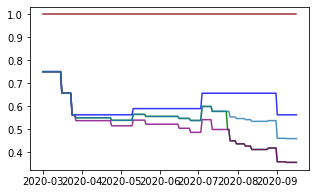

In [12]:
f, ax = plt.subplots(figsize=(5,3))
for i in range(len(groups)):
    if groups[i] == 'pub':
        ax.plot(dates, group_betas[:,i], label = 'pub, cinema, school', alpha=0.8, color='blue')
    elif groups[i] == 'grocery':
        ax.plot(dates, group_betas[:,i], label = 'grocery', alpha=0.9, color='green')
    elif groups[i] == 'household':
        ax.plot(dates, group_betas[:,i], label = 'household, hospital', alpha=0.8, color='maroon')
    elif groups[i] == 'city_transport':
        ax.plot(dates, group_betas[:,i], label = 'city transport, inter city transport', alpha=0.8, color='purple')
    elif groups[i] == 'care_home':
        ax.plot(dates, group_betas[:,i], label = 'care home, company, university', alpha=0.8)
ax.vlines(datetime(2020,3,16),0.5,1.1,linestyle='--', color=self.colors['16_March'], label='16th March')
ax.vlines(datetime(2020,3,23),0.5,1.1,linestyle='--', color=self.colors['23_March'], label='23rd March')
ax.vlines(datetime(2020,7,4),0.5,1.1,linestyle='--', color=self.colors['4_July'], label='4th July')
ax.set_ylabel('Beta fraction')
ax.set_xlabel('Date')
ax.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)